In [ ]:
!git clone https://github.com/jiny2001/dcscn-super-resolution.git

Cloning into 'dcscn-super-resolution'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1270 (delta 18), reused 16 (delta 7), pack-reused 1227
Receiving objects: 100% (1270/1270), 388.67 MiB | 26.85 MiB/s, done.
Resolving deltas: 100% (519/519), done.
Checking out files: 100% (475/475), done.


**Downloading the Dataset**


In [ ]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2021-02-06 20:01:30--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  17.9MB/s    in 35s     

2021-02-06 20:02:06 (9.00 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



In [ ]:
import glob
!unzip /content/UCMerced_LandUse.zip -d /content/
Land_images = glob.glob('/content/UCMerced_LandUse/Images/**/*.tif') #returns path of images
print(len(Land_images)) #contains 2100 images

Archive:  /content/UCMerced_LandUse.zip
   creating: /content/UCMerced_LandUse/Images/
   creating: /content/UCMerced_LandUse/Images/agricultural/
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: /content/UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: /content/UCMerced_LandUse/Images/agricul

**Apply DCSCN Model**

In [ ]:
!pwd

/content/dcscn-super-resolution


In [ ]:
%cd dcscn-super-resolution

[Errno 2] No such file or directory: 'dcscn-super-resolution'
/content/dcscn-super-resolution


In [ ]:
!python DCSCN.py

2021-02-06 21:04:37.791188: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
%ls

augmentation.py*  DCSCN.py    evaluate.py  models/    sr.py
convert_y.py*     Dockerfile  helper/      Pipfile    train.py
data/             documents/  LICENSE      README.md


In [ ]:
!python augmentation.py --dataset=airplane --augment_level=8

In [ ]:
!python train.py --dataset=airplane --layers=8 --filters=96 

In [ ]:
!python train.py --dataset=agricultural --layers=8 --filters=96 --training_images=50

2021-01-31 15:49:23.431979: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Python Interpreter version:3.6
tensorflow version:2.4.1
numpy version:1.19.5
Session and graph initialized.
2021-01-31 15:49:25.762640: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-31 15:49:25.802342: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-31 15:49:25.881925: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-31 15:49:25.882004: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b6fe90a76dcc): /proc/driver/nvidia/version does not exist

DCSCN v2-------------------------------------
2021/1/31 15:49:25 [dcscn_L8_F96to48_NIN_A64_PS_R1F32]
Fe

In [ ]:
!python sr.py --layers=8 --filters=96 --file=/content/UCMerced_LandUse/Images/river/river00.tif

2021-01-27 23:17:03.749471: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Python Interpreter version:3.6
tensorflow version:2.4.1
numpy version:1.19.5
Session and graph initialized.
2021-01-27 23:17:06.135790: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-27 23:17:06.137087: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-27 23:17:06.161801: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-01-27 23:17:06.161861: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e40888f50192): /proc/driver/nvidia/version does not exist

DCSCN v2-------------------------------------
2021/1/27 23:17:6 [dcscn_L8_F96to48_NIN_A64_PS_R1F32]
Fea

In [ ]:
!python evaluate.py --test_dataset=airplane --save_results=true --layers=8 --filters=96

2021-02-06 23:32:26.042140: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Python Interpreter version:3.6
tensorflow version:2.4.1
numpy version:1.19.5
Session and graph initialized.
2021-02-06 23:32:28.589849: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-06 23:32:28.591539: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-06 23:32:28.605132: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-02-06 23:32:28.605185: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (56069f9f44fc): /proc/driver/nvidia/version does not exist

DCSCN v2-------------------------------------
2021/2/6 23:32:28 [dcscn_L8_F96to48_NIN_A64_PS_R1F32]
Fea

In [ ]:
!python sr.py --file=/content/dcscn-super-resolution/data/low.png --layers=8 --filters=96

2021-02-06 21:08:22.235965: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Python Interpreter version:3.6
tensorflow version:2.4.1
numpy version:1.19.5
Session and graph initialized.
2021-02-06 21:08:24.551737: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-06 21:08:24.552396: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-06 21:08:24.561733: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-02-06 21:08:24.561787: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (56069f9f44fc): /proc/driver/nvidia/version does not exist

DCSCN v2-------------------------------------
2021/2/6 21:8:24 [dcscn_L8_F96to48_NIN_A64_PS_R1F32]
Feat

In [ ]:
!python sr.py --file=/content/dcscn-super-resolution/data/airplane01.tif --layers=8 --filters=96

2021-02-06 21:59:49.983601: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Python Interpreter version:3.6
tensorflow version:2.4.1
numpy version:1.19.5
Session and graph initialized.
2021-02-06 21:59:52.616572: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-06 21:59:52.619098: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-06 21:59:52.633321: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-02-06 21:59:52.633393: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (56069f9f44fc): /proc/driver/nvidia/version does not exist

DCSCN v2-------------------------------------
2021/2/6 21:59:52 [dcscn_L8_F96to48_NIN_A64_PS_R1F32]
Fea

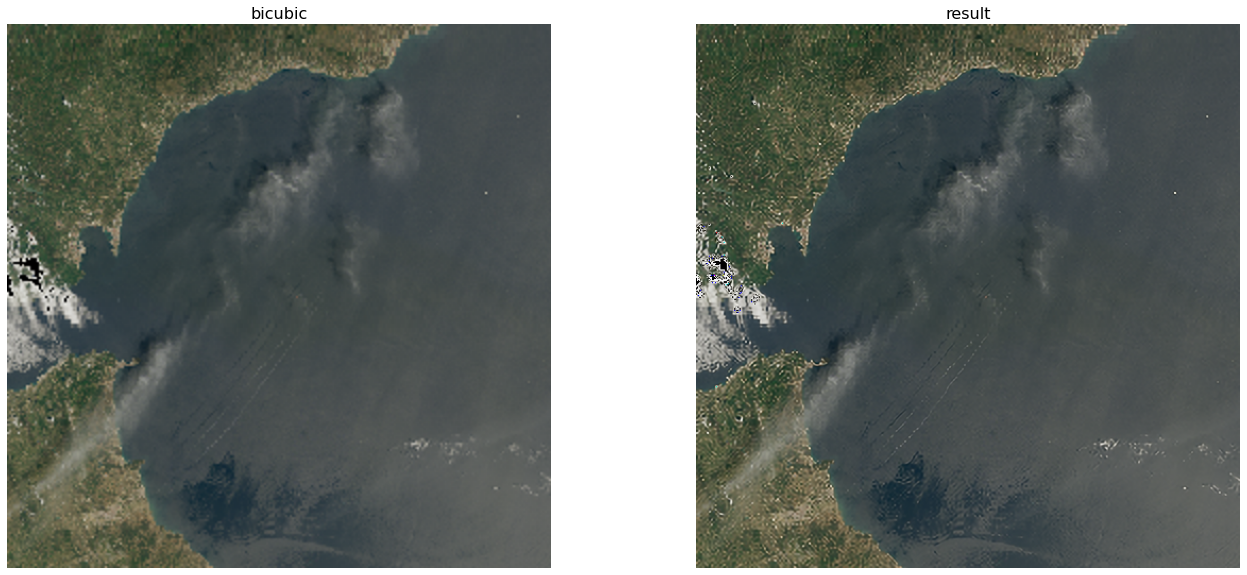

In [ ]:
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
#img_input = imread('/content/dcscn-super-resolution/data/low.png')
img_bicubic = imread('/content/dcscn-super-resolution/output/dcscn_L8_F96to48_NIN_A64_PS_R1F32/low_bicubic.png')
img_output = imread('/content/dcscn-super-resolution/output/dcscn_L8_F96to48_NIN_A64_PS_R1F32/low_result.png')

# show and compare the results
fig = plt.figure(figsize=(35, 10))
#ax1 = fig.add_subplot(1, 3, 1) 
#plt.title('Input image', fontsize=16)
#ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('bicubic', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3) 
plt.title('result', fontsize=16)
ax3.axis('off')
ax1.imshow(img_input)
ax2.imshow(img_bicubic)
ax3.imshow(img_output)

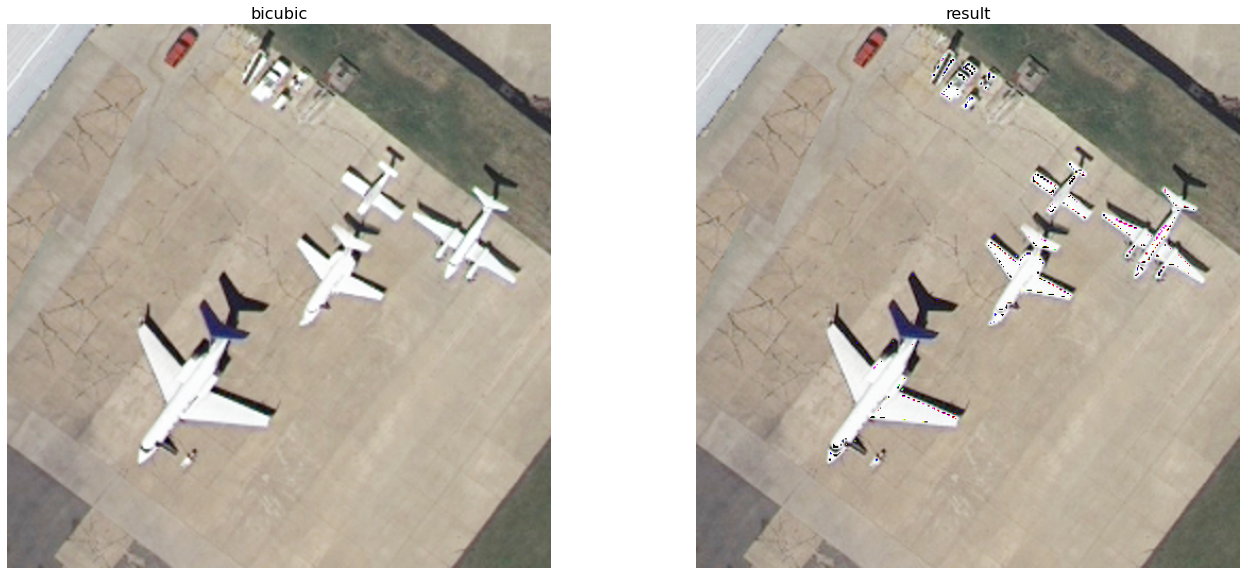

In [ ]:
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
#img_input = imread('/content/dcscn-super-resolution/data/low.png')
img_bicubic = imread('/content/airplane00_bicubic.tif')
img_output = imread('/content/airplane00_result.tif')

# show and compare the results
fig = plt.figure(figsize=(35, 10))
#ax1 = fig.add_subplot(1, 3, 1) 
#plt.title('Input image', fontsize=16)
#ax1.axis('off')
ax2 = fig.add_subplot(1, 3, 2)
plt.title('bicubic', fontsize=16)
ax2.axis('off')
ax3 = fig.add_subplot(1, 3, 3) 
plt.title('result', fontsize=16)
ax3.axis('off')
#ax1.imshow(img_input)
ax2.imshow(img_bicubic)
ax3.imshow(img_output)